# Linear Regression Model With One Variable

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# open dataset file
file = open("dataset1.txt", "r")

# read samples from dataset file
x_sample = []
y_sample = []

for f in file:
    x, y = f.split(',')
    x_sample.append(float(x))
    y_sample.append(float(y))

    
x_sample = np.array(x_sample)
y_sample = np.array(y_sample)

x_sample

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [3]:
# reshaping list of samples
x_sample = x_sample.reshape((x_sample.shape[0], 1))

x_sample[0:5]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598]])

In [4]:
n = x_sample.shape[0]   # number of training samples
m = x_sample.shape[1]   # number of features
X = np.concatenate((np.ones((n, 1)), x_sample), axis=1)   # add a coloumn of ones to X (for future calculations)

X[0:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

## 1. Closed Form

In [5]:
# main part of approach
theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_sample))
theta_CF = theta
print('The solution for theta are:', theta_CF[0], theta_CF[1])

The solution for theta are: -3.8957808783119106 1.1930336441895992


## 2. Gradient Descent (online/stochastic mode)

In [6]:
learning_rate = 0.0001
iterations = 1500
W = np.random.randn(m + 1, )

In [7]:
J_online = []   # cost values in each epoch 
grad = np.zeros(len(W))

# main part of approach
for i in range(iterations):
    y_hat = X@W

    # update parameters after considering each sample
    for j in range(n):   # iterate on samples
        for k in range(len(W)):   # iterate on features (to find all thetas)
            grad[k] = (X[j][k]*(y_hat[j] - y_sample[j]))
            W[k] -= learning_rate * grad[k]
        
    # calculate cost(J) in each epoch
    J_online.append(np.sum((y_hat - y_sample)**2)/(2*n))

theta_online = W
print('The solution for theta is:', theta_online)

The solution for theta is: [-3.65147598  1.16849057]


## 3. Gradient Descent (Batch mode)

In [8]:
learning_rate = 0.0001
iterations = 1500
W = np.random.randn(m + 1, )

In [9]:
J_Batch = []   # cost values in each epoch 
grad = np.zeros(len(W))

# main part of approach
for i in range(iterations):
    y_hat = X@W    
    
    # update parameters after considering all samples
    for k in range(len(W)):   # iterate on features (to find all thetas)
        grad[k] = (X[:,k]@(y_hat - y_sample))/n
        W[k] -= learning_rate * grad[k]
    
    # calculate cost(J) in each epoch
    J_Batch.append(np.sum((y_hat - y_sample)**2)/(2*n))
    
theta_batch = W
print('The solution for theta is:', theta_batch)

The solution for theta is: [-1.06068403  0.90821628]


## Plots

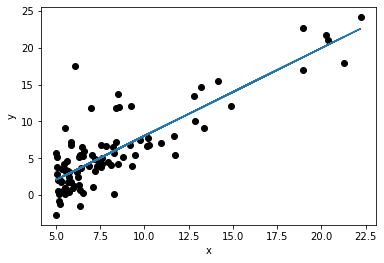

In [10]:
plt.scatter(x_sample, y_sample, color='black')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_sample, X@theta_CF, label='Closed Form')

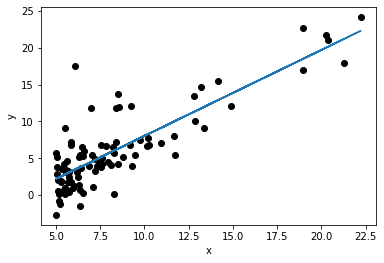

In [11]:
plt.scatter(x_sample, y_sample, color='black')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_sample, X@theta_online, label='GD Online')

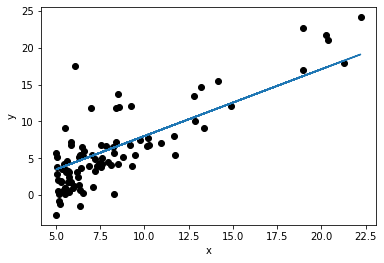

In [12]:
plt.scatter(x_sample, y_sample, color='black')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_sample, X@theta_batch, label='GD Batch')

## Prediction

In [13]:
x_pred = np.array([[6.2], [12.8], [22.1], [30]])
X_pred = np.concatenate((np.ones((4, 1)), x_pred), axis=1)

# Closed Form
y_pred = X_pred@theta_CF
print('Closed Form predicted values:', y_pred)

# GD Online
y_pred = X_pred@theta_online
print('GD Online predicted values:', y_pred)

# GD Batch
y_pred = X_pred@theta_batch
print('GD Batch predicted values:', y_pred)

Closed Form predicted values: [ 3.50102772 11.37504977 22.47026266 31.89522845]
GD Online predicted values: [ 3.59316554 11.30520328 22.17216556 31.40324104]
GD Batch predicted values: [ 4.57025694 10.56448442 19.01089587 26.18580451]


## Plot all models thogether

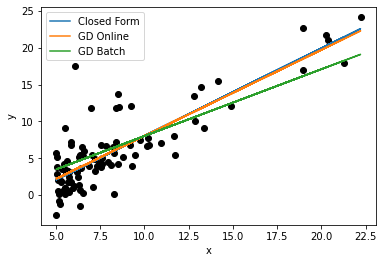

In [14]:
plt.scatter(x_sample, y_sample, color='black')
plt.xlabel('x')
plt.ylabel('y')

x = x_sample
plt.plot(x, X@theta_CF, label='Closed Form')
plt.plot(x, X@theta_online, label='GD Online')
plt.plot(x, X@theta_batch, label='GD Batch')
plt.legend()

## Plot J values for each epoch

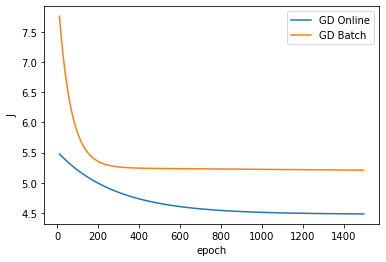

In [19]:
epoch = np.array([i for i in range(10, len(J_online))])
plt.plot(epoch, J_online[10:], label='GD Online')
plt.plot(epoch, J_Batch[10:], label='GD Batch')
plt.xlabel('epoch')
plt.ylabel('J')
plt.legend()